<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b2a05acc4120>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
# Prepare age groups
bins = [0, 35, 70, 100]
labels = ['<=35 years', '36-70 years', '70+ years']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

### **Visualizations:**

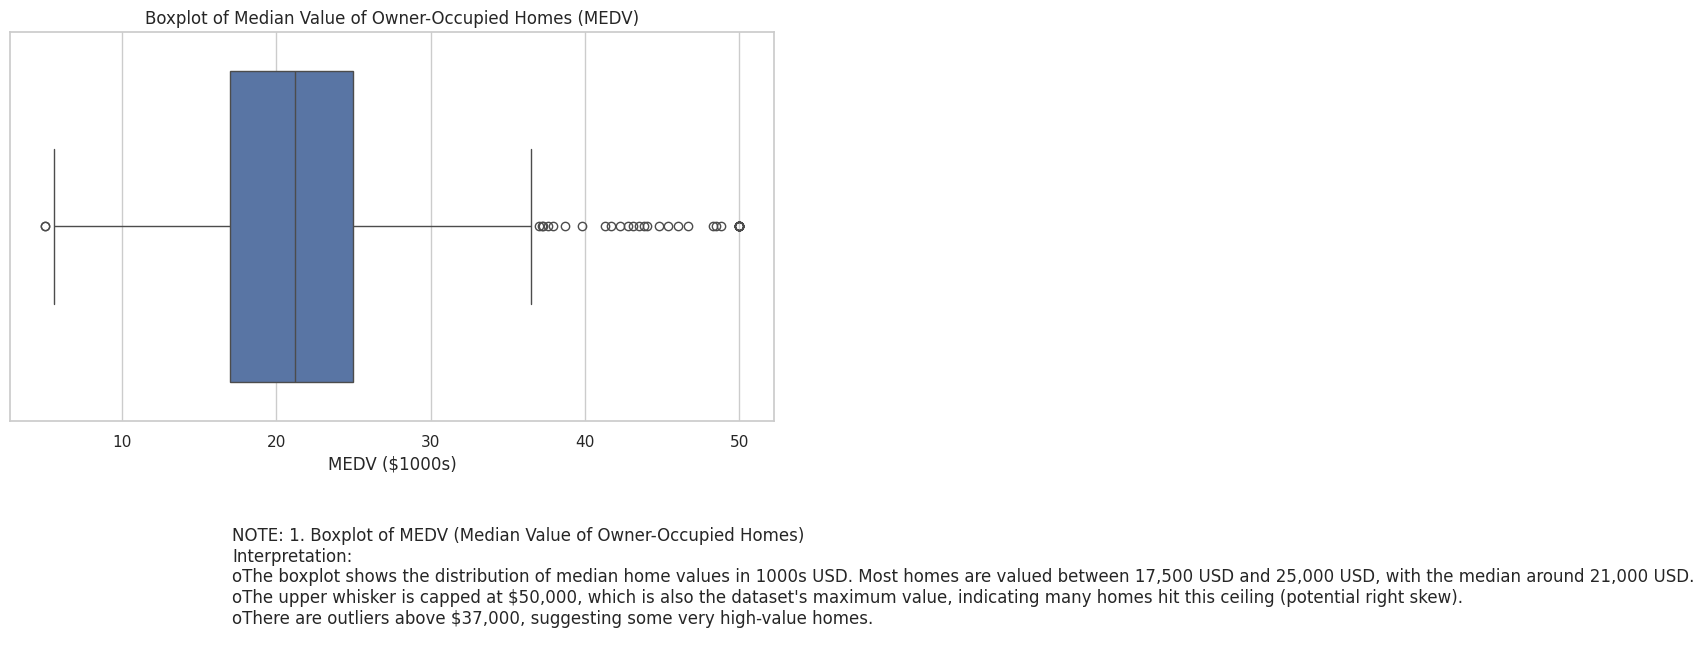

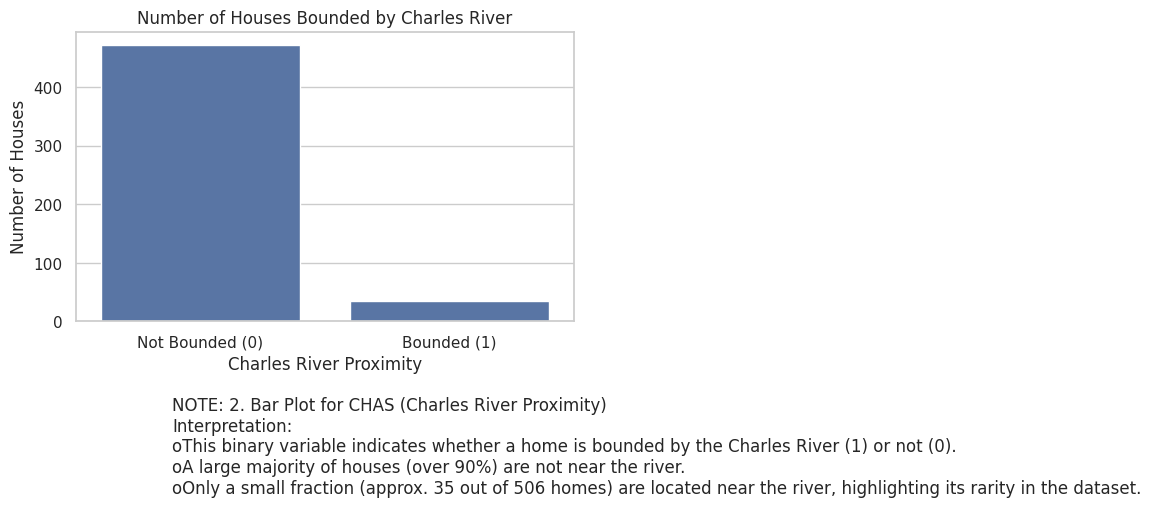

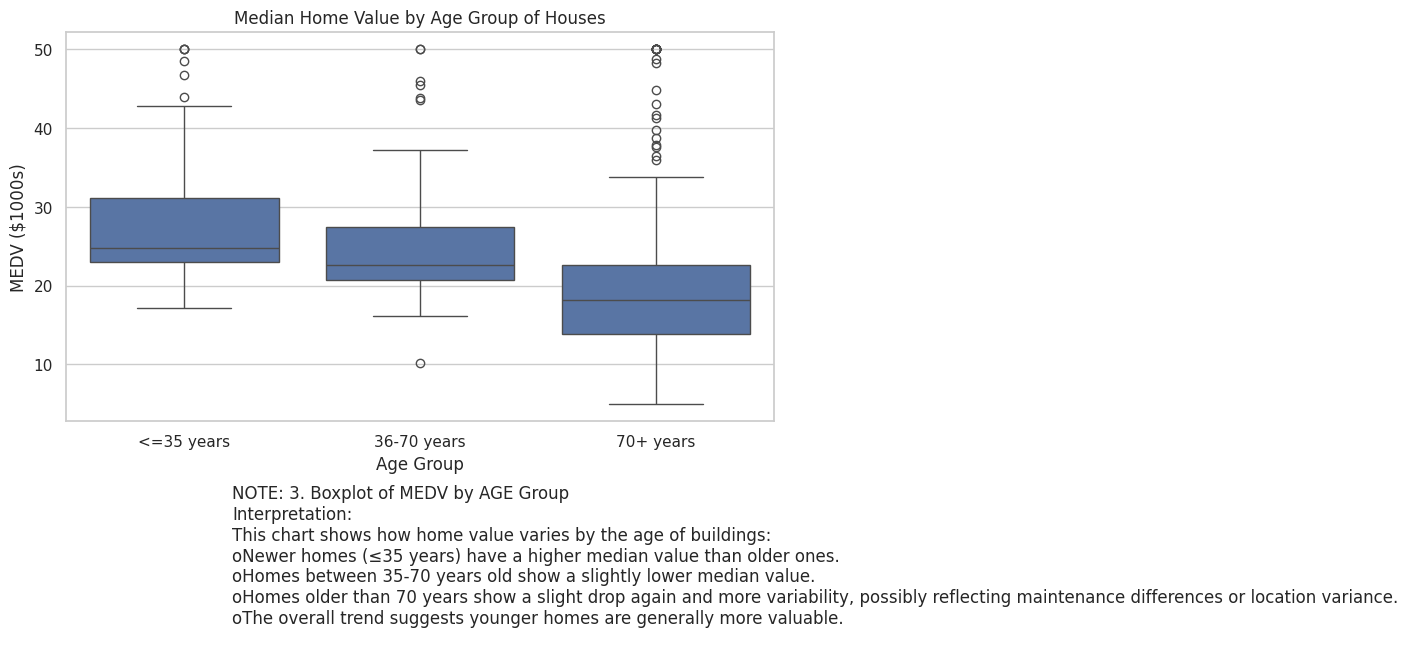

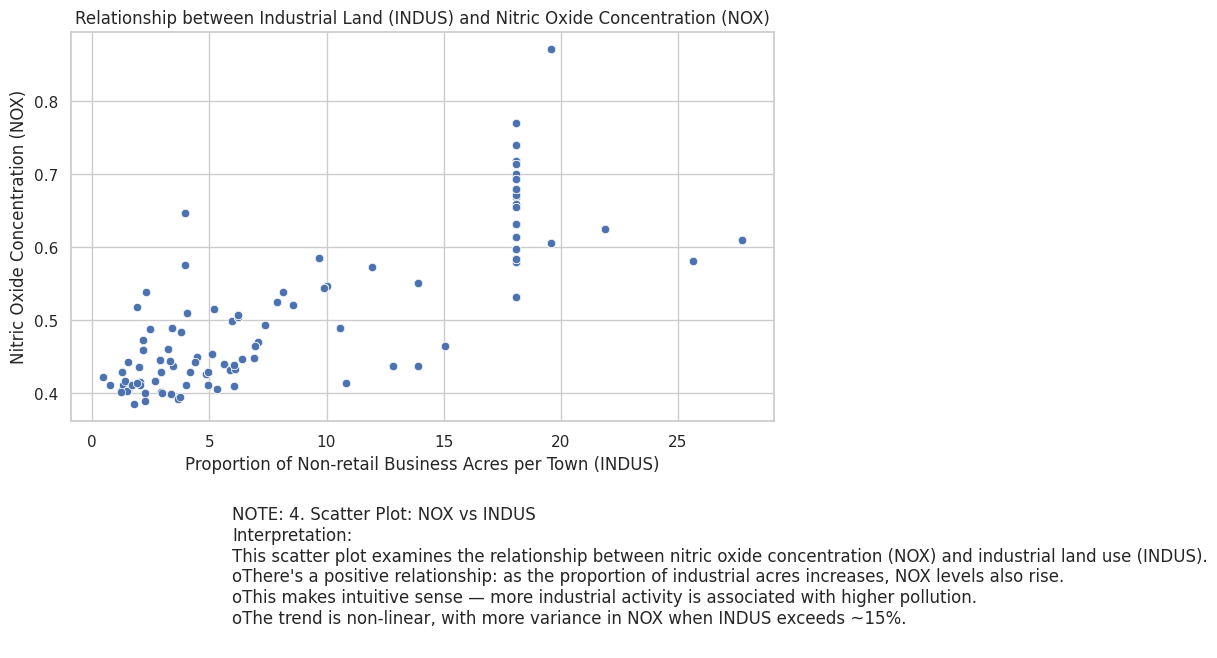

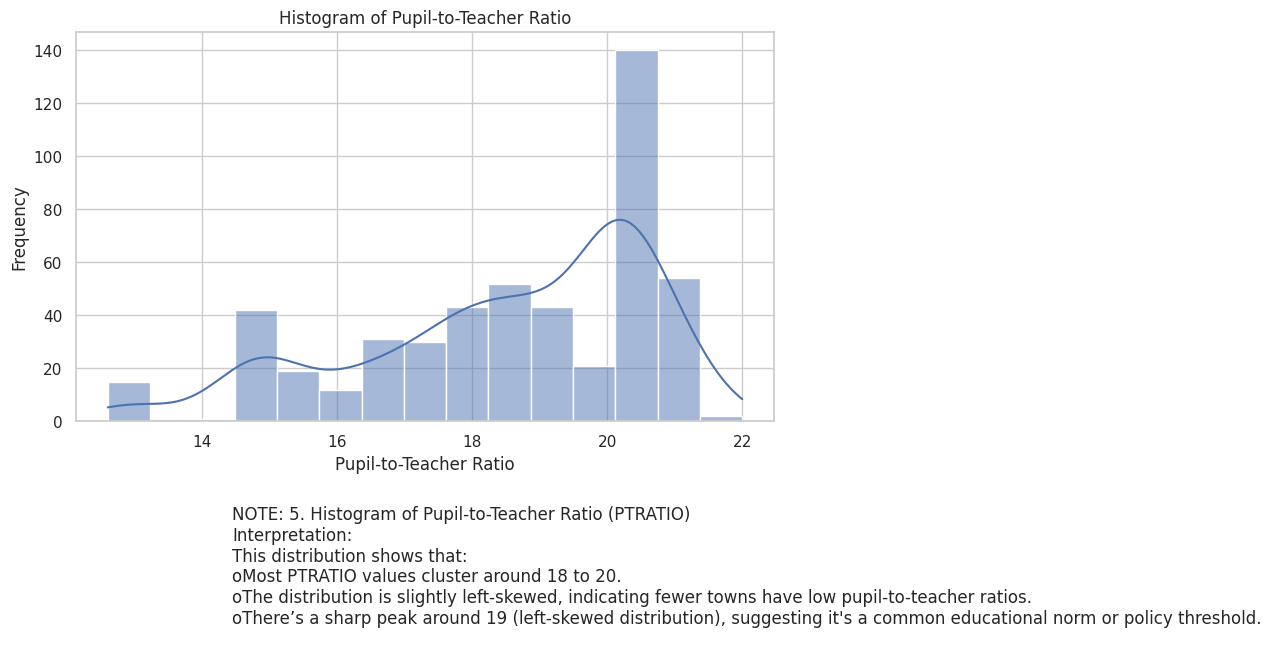

In [7]:
# Set plot style
sns.set(style="whitegrid")

# Add commentary text for each plot
comment_1 = ("NOTE: 1. Boxplot of MEDV (Median Value of Owner-Occupied Homes)\n"
"Interpretation:\n"
        "oThe boxplot shows the distribution of median home values in 1000s USD. Most homes are valued between 17,500 USD and 25,000 USD, with the median around 21,000 USD.\n"
        "oThe upper whisker is capped at $50,000, which is also the dataset's maximum value, indicating many homes hit this ceiling (potential right skew).\n"
        "oThere are outliers above $37,000, suggesting some very high-value homes.\n")

comment_2 = ("NOTE: 2. Bar Plot for CHAS (Charles River Proximity)\n"
"Interpretation:\n"
        "oThis binary variable indicates whether a home is bounded by the Charles River (1) or not (0).\n"
        "oA large majority of houses (over 90%) are not near the river.\n"
        "oOnly a small fraction (approx. 35 out of 506 homes) are located near the river, highlighting its rarity in the dataset.\n")

comment_3 = ("NOTE: 3. Boxplot of MEDV by AGE Group\n"
"Interpretation:\n"
        "This chart shows how home value varies by the age of buildings:\n"
        "oNewer homes (≤35 years) have a higher median value than older ones.\n"
        "oHomes between 35-70 years old show a slightly lower median value.\n"
        "oHomes older than 70 years show a slight drop again and more variability, possibly reflecting maintenance differences or location variance.\n"
        "oThe overall trend suggests younger homes are generally more valuable.\n")

comment_4 = ("NOTE: 4. Scatter Plot: NOX vs INDUS\n"
"Interpretation:\n"
        "This scatter plot examines the relationship between nitric oxide concentration (NOX) and industrial land use (INDUS).\n"
        "oThere's a positive relationship: as the proportion of industrial acres increases, NOX levels also rise.\n"
        "oThis makes intuitive sense — more industrial activity is associated with higher pollution.\n"
        "oThe trend is non-linear, with more variance in NOX when INDUS exceeds ~15%.\n")

comment_5 = ("NOTE: 5. Histogram of Pupil-to-Teacher Ratio (PTRATIO)\n"
"Interpretation:\n"
        "This distribution shows that:\n"
        "oMost PTRATIO values cluster around 18 to 20.\n"
        "oThe distribution is slightly left-skewed, indicating fewer towns have low pupil-to-teacher ratios.\n"
        "oThere’s a sharp peak around 19 (left-skewed distribution), suggesting it's a common educational norm or policy threshold.\n")

# Boxplot for MEDV
plt.figure(figsize=(8, 5))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('MEDV ($1000s)')
plt.tight_layout()
plt.figtext(0.3, -0.3, comment_1, wrap=True, horizontalalignment='left', fontsize=12)
plt.show()

# Bar plot for CHAS (Charles River dummy variable)
plt.figure(figsize=(6, 4))
chas_counts = boston_df['CHAS'].value_counts().sort_index()
chas_counts.index = ['Not Bounded (0)', 'Bounded (1)']
sns.barplot(x=chas_counts.index, y=chas_counts.values)
plt.title('Number of Houses Bounded by Charles River')
plt.ylabel('Number of Houses')
plt.xlabel('Charles River Proximity')
plt.tight_layout()
plt.figtext(0.3, -0.3, comment_2, wrap=True, horizontalalignment='left', fontsize=12)
plt.show()

# Boxplot for MEDV vs AGE group
plt.figure(figsize=(8, 5))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Median Home Value by Age Group of Houses')
plt.xlabel('Age Group')
plt.ylabel('MEDV ($1000s)')
plt.tight_layout()
plt.figtext(0.3, -0.3, comment_3, wrap=True, horizontalalignment='left', fontsize=12)
plt.show()

# Scatter plot: NOX vs INDUS
plt.figure(figsize=(8, 5))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Relationship between Industrial Land (INDUS) and Nitric Oxide Concentration (NOX)')
plt.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.tight_layout()
plt.figtext(0.3, -0.3, comment_4, wrap=True, horizontalalignment='left', fontsize=12)
plt.show()

# Histogram for PTRATIO (Pupil-Teacher Ratio)
plt.figure(figsize=(8, 5))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.figtext(0.3, -0.3, comment_5, wrap=True, horizontalalignment='left', fontsize=12)
plt.show()

## Q1: Is there a significant difference in the median value of houses bounded by the Charles river or not?

#### 1. T-test:

**Test Used:** Independent Samples t-test  
**Variables:** `CHAS` (0 = not bounded, 1 = bounded), `MEDV` (Median value of owner-occupied homes)

- **Null Hypothesis (H₀):**  
  There is no significant difference in the median value of houses bounded by the Charles River and those that are not.  
  $$ \mu_{\text{CHAS=1}} = \mu_{\text{CHAS=0}} $$

- **Alternative Hypothesis (H₁):**  
  There is a significant difference in the median value of houses based on whether they are bounded by the Charles River or not.  
  $$ \mu_{\text{CHAS=1}} \neq \mu_{\text{CHAS=0}} $$

In [8]:
# Grouping Charles River variable for t-test
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
ttest_result = stats.ttest_ind(group1, group0)
ttest_result

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#### Since the p-value *(7.39e-05)* is much smaller than 0.05, we reject the null hypothesis that there is no difference in median home values between houses bounded by the Charles River and those not bounded by it.
#### **Conclusion:** There is a statistically significant difference in median house values based on proximity to the Charles River.

## Q2: Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

#### 2. ANOVA:

**Test Used:** One-Way ANOVA  
**Variables:** `AGE` (discretized into 3 groups), `MEDV`

- **Null Hypothesis (H₀):**  
  The mean house value is equal across all age groups.  
  $$ \mu_{\text{age group 1}} = \mu_{\text{age group 2}} = \mu_{\text{age group 3}} $$

- **Alternative Hypothesis (H₁):**  
  At least one age group has a different mean house value.  
  $$ \exists \; i, j \text{ such that } \mu_i \neq \mu_j $$

In [9]:
# ANOVA between AGE groups and MEDV
anova_result = stats.f_oneway(
    boston_df[boston_df['AGE_GROUP'] == '<=35 years']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '36-70 years']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '70+ years']['MEDV']
)
anova_result

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

#### The extremely low p-value *(1.71e-15)* indicates strong evidence to reject the null hypothesis of equal median house values across the AGE groups.
#### **Conclusion:** There is a statistically significant difference in median house values among different proportions of older houses (built before 1940).

## Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

#### 3. Pearson Correlation:

**Test Used:** Pearson Correlation Coefficient  
**Variables:** `NOX` (nitric oxide concentration), `INDUS` (non-retail business acres)

- **Null Hypothesis (H₀):**  
  There is no linear correlation between nitric oxide concentration and the proportion of non-retail business acres.  
  $$ \rho = 0 $$

- **Alternative Hypothesis (H₁):**  
  There is a linear correlation between nitric oxide concentration and the proportion of non-retail business acres.  
  $$ \rho \neq 0 $$

In [10]:
# Pearson correlation between NOX and INDUS
pearson_corr, pearson_p = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(pearson_corr, pearson_p)

0.7636514469209192 7.913361061210442e-98


#### The positive correlation coefficient close to 0.76 indicates a strong positive linear relationship between nitric oxide concentration and the proportion of non-retail business acres. The extremely small p-value *(7.91e-98)* means this relationship is statistically significant.
#### **Conclusion:** We reject the hypothesis that there is no relationship and conclude there is a strong, statistically significant positive association between NOX and INDUS.

## Q4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

#### 4. Regression Analysis:

**Test Used:** Simple Linear Regression  
**Variables:** `DIS` (distance to employment centers), `MEDV` (median value of homes)

- **Null Hypothesis (H₀):**  
  There is no relationship between distance to employment centers and home value.  
  $$ \beta_1 = 0 $$

- **Alternative Hypothesis (H₁):**  
  Distance to employment centers has a significant impact on home value.  
  $$ \beta_1 \neq 0 $$

In [11]:
# Regression analysis: DIST to employment centers vs MEDV
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']
regression_model = sm.OLS(y, X).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 08 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        21:24:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

#### The positive coefficient *(1.09)* means that for each additional unit increase in weighted distance to employment centers, the median home value increases by approximately *1090 USD* (since MEDV is in *1000's USD*). The p-value *(1.21e-08)* is very small, indicating this effect is statistically significant.
#### However, the R-squared is 0.062, meaning only about 6.2% of the variability in median home values is explained by distance alone—so other factors also play a large role.
#### **Conclusion:** There is a statistically significant but small positive effect of distance to employment centers on median home values.

In [12]:
# Collecting all outputs
test_results = {
    "T-test (Charles River)": {
        "p-value": ttest_result.pvalue,
        "significant": ttest_result.pvalue < 0.05
    },
    "ANOVA (AGE groups)": {
        "p-value": anova_result.pvalue,
        "significant": anova_result.pvalue < 0.05
    },
    "Pearson Correlation (NOX vs INDUS)": {
        "correlation": pearson_corr,
        "p-value": pearson_p,
        "significant": pearson_p < 0.05
    },
    "Regression (DIS vs MEDV)": {
        "coef": regression_model.params['DIS'],
        "p-value": regression_model.pvalues['DIS'],
        "r-squared": regression_model.rsquared,
        "significant": regression_model.pvalues['DIS'] < 0.05
    }
}
test_results

{'T-test (Charles River)': {'p-value': 7.390623170519905e-05,
  'significant': True},
 'ANOVA (AGE groups)': {'p-value': 1.7105011022702984e-15,
  'significant': True},
 'Pearson Correlation (NOX vs INDUS)': {'correlation': 0.7636514469209192,
  'p-value': 7.913361061210442e-98,
  'significant': True},
 'Regression (DIS vs MEDV)': {'coef': 1.091613015841107,
  'p-value': 1.2066117273372235e-08,
  'r-squared': 0.062464372121781686,
  'significant': True}}

In [13]:
results_df = pd.DataFrame(test_results).T
print(results_df)

                                     p-value significant correlation  \
T-test (Charles River)              0.000074        True         NaN   
ANOVA (AGE groups)                       0.0        True         NaN   
Pearson Correlation (NOX vs INDUS)       0.0        True    0.763651   
Regression (DIS vs MEDV)                 0.0        True         NaN   

                                        coef r-squared  
T-test (Charles River)                   NaN       NaN  
ANOVA (AGE groups)                       NaN       NaN  
Pearson Correlation (NOX vs INDUS)       NaN       NaN  
Regression (DIS vs MEDV)            1.091613  0.062464  
